In [236]:
import pandas as pd
import numpy as np

In [237]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [238]:
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
data=pd.read_csv('customer_segmentation.csv')

In [240]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [241]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [242]:
data.shape

(2240, 29)

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [244]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [245]:
data=data.dropna()

In [246]:
data.isnull().sum().sum()

0

In [247]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [248]:
data["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [249]:
data["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

Data Cleaning and feature engineering


In [250]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   int64 

In [251]:
data["Dt_Customer"]=pd.to_datetime(data["Dt_Customer"], dayfirst=True)

In [252]:
data["Age"]=2025-data["Year_Birth"]

In [253]:
data["Total_Children"]=data["Kidhome"]+data["Teenhome"]
data["Total_Children"].reset_index()

,index,Total_Children
0,0,0
1,1,2
2,2,0
3,3,1
4,4,1
...,...,...
2211,2235,1
2212,2236,3
2213,2237,0
2214,2238,1


In [254]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children'],
      dtype='object')

In [255]:
spend=["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
data["Total_spending"]=data[spend].sum(axis=1)
data["Total_spending"].reset_index()

,index,Total_spending
0,0,1617
1,1,27
2,2,776
3,3,53
4,4,422
...,...,...
2211,2235,1341
2212,2236,444
2213,2237,1241
2214,2238,843


In [256]:
data["Customer_Since"]= (pd.Timestamp("today") - data["Dt_Customer"]).dt.days

In [257]:
data["Customer_Since"]

0       4896
1       4346
2       4545
3       4372
4       4394
        ... 
2235    4614
2236    4252
2237    4388
2238    4389
2239    4855
Name: Customer_Since, Length: 2216, dtype: int64

EDA


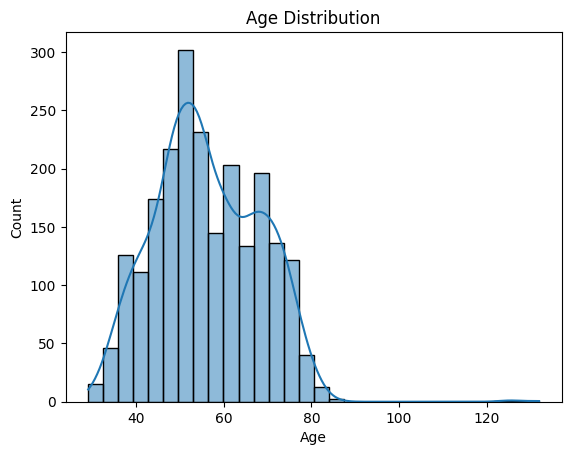

In [258]:
sns.histplot(data["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

In [259]:
data["Age"].describe()

count    2216.000000
mean       56.179603
std        11.985554
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

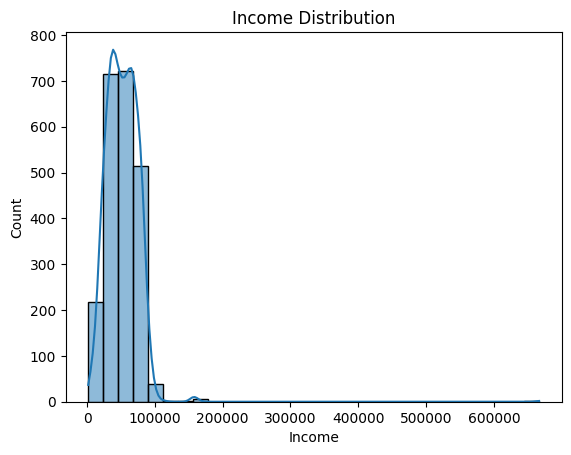

In [260]:
sns.histplot(data["Income"], bins=30, kde=True)
plt.title("Income Distribution")
plt.show()

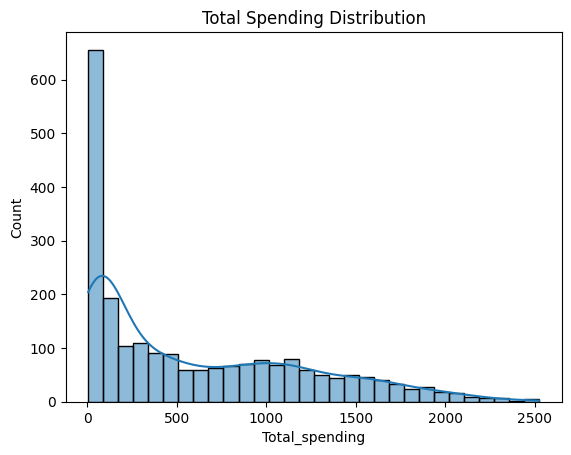

In [261]:
sns.histplot(data["Total_spending"], bins=30, kde=True)
plt.title("Total Spending Distribution")
plt.show()

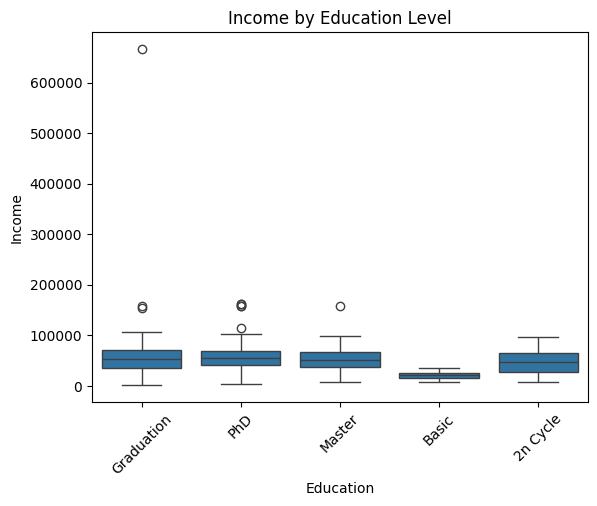

In [262]:
sns.boxplot(x="Education", y="Income", data=data)
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

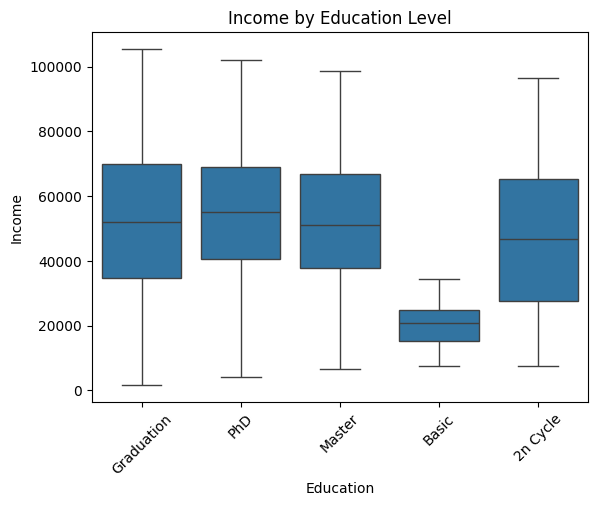

In [263]:
sns.boxplot(x="Education", y="Income", data=data, showfliers=False)
plt.xticks(rotation=45)
plt.title("Income by Education Level")
plt.show()

In [264]:
data.groupby("Education")["Income"].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
2n Cycle,200.0,47633.190000,22119.081838,7500.0,27526.50,46805.0,65393.25,96547.0
Basic,54.0,20306.259259,6235.066773,7500.0,15405.25,20744.0,24882.00,34445.0
Graduation,1116.0,52720.373656,28177.192681,1730.0,34834.50,52028.5,69930.50,666666.0
Master,365.0,52917.534247,20157.788029,6560.0,37760.00,50943.0,66726.00,157733.0
PhD,481.0,56145.313929,20612.979997,4023.0,40451.00,55212.0,69098.00,162397.0


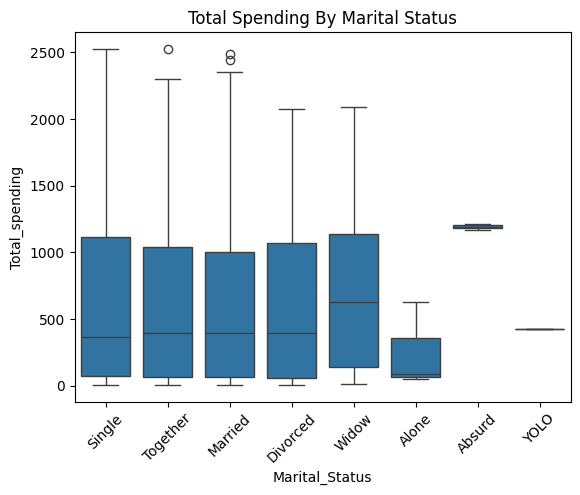

In [265]:
sns.boxplot(x="Marital_Status", y="Total_spending",data=data)
plt.xticks(rotation=45)
plt.title("Total Spending By Marital Status")
plt.show()

In [266]:
data.groupby("Marital_Status")["Total_spending"].describe()

,count,mean,std,min,25%,50%,75%,max
Marital_Status,,,,,,,,
Absurd,2.0,1192.500000,33.234019,1169.0,1180.75,1192.5,1204.25,1216.0
Alone,3.0,256.666667,325.662914,49.0,69.00,89.0,360.50,632.0
Divorced,232.0,610.629310,580.628672,6.0,61.25,395.0,1073.00,2074.0
Married,857.0,591.464411,591.191468,8.0,68.00,396.0,1001.00,2486.0
Single,471.0,612.592357,631.292753,5.0,71.00,369.0,1118.50,2525.0
Together,573.0,608.846422,610.413855,8.0,69.00,395.0,1040.00,2524.0
Widow,76.0,727.960526,576.897760,15.0,138.00,625.5,1136.50,2088.0
YOLO,2.0,424.000000,0.000000,424.0,424.00,424.0,424.00,424.0


In [267]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_spending', 'Customer_Since'],
      dtype='object')

In [268]:
correlation_matrix=data[["Income", "Age", "Recency", "Total_spending", "NumWebPurchases", "NumStorePurchases"]].corr()
correlation_matrix

,Income,Age,Recency,Total_spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


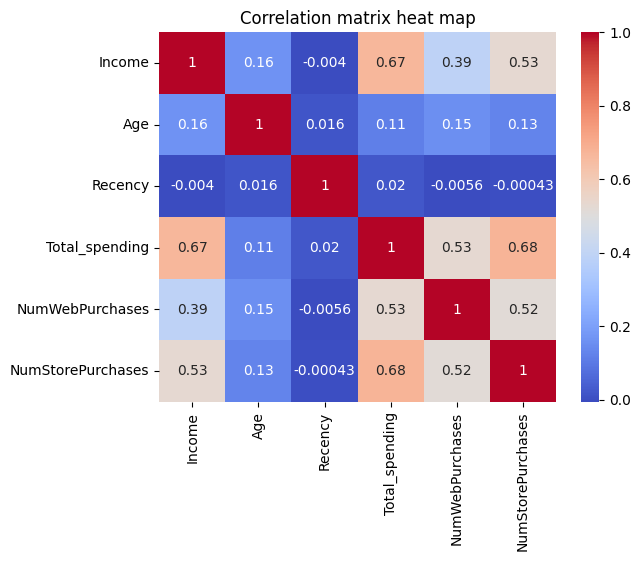

In [269]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation matrix heat map")
plt.show()

In [270]:
pivot_table_income=data.pivot_table(values="Income", index="Education", columns="Marital_Status", aggfunc="mean")

In [271]:
pivot_table_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Inome By Education and Marital Status')

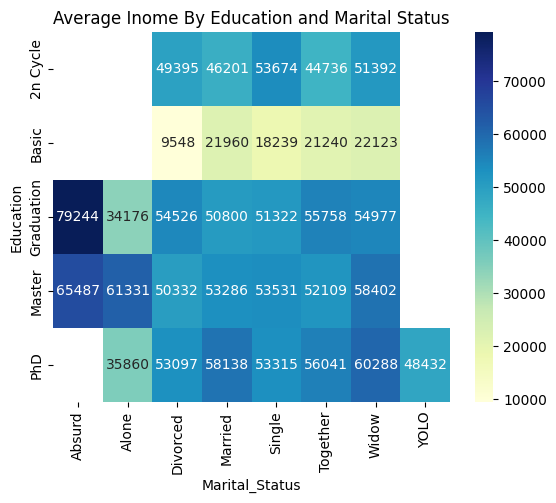

In [272]:
sns.heatmap(pivot_table_income, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Inome By Education and Marital Status")

In [273]:
group_Education=data.groupby("Education")["Total_spending"].mean()
group_Education.sort_values(ascending=False)

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_spending, dtype: float64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2n Cycle'),
  Text(1, 0, 'Basic'),
  Text(2, 0, 'Graduation'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'PhD')])

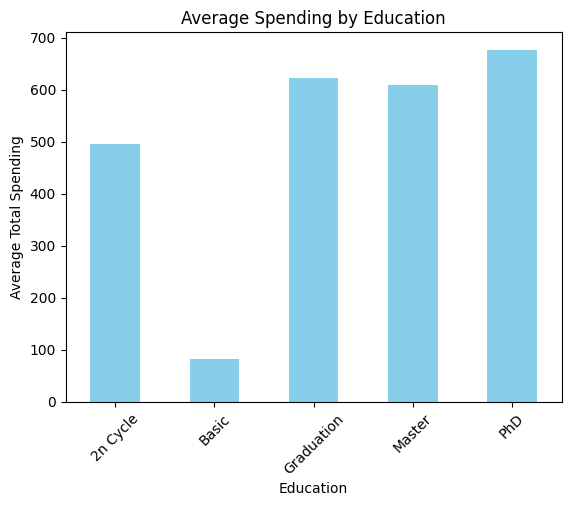

In [274]:
group_Education.plot(kind="bar", color="skyblue")
plt.title("Average Spending by Education")
plt.ylabel("Average Total Spending")
plt.xticks(rotation = 45)

In [275]:
data["AcceptedAny"]=data[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]].sum(axis=1)
data["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [276]:
data["AcceptedAny"]=data["AcceptedAny"].apply(lambda x : 1 if x>0 else 0)

In [277]:
group_Marital=data.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)
group_Marital

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

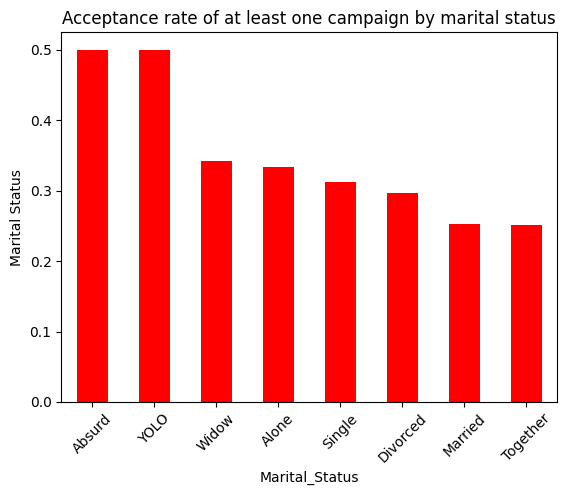

In [278]:
group_Marital.plot(kind="bar", color="red")
plt.title("Acceptance rate of at least one campaign by marital status")
plt.ylabel("Marital Status")
plt.xticks(rotation = 45)
plt.show()

In [279]:
data["Age"].describe()

count    2216.000000
mean       56.179603
std        11.985554
min        29.000000
25%        48.000000
50%        55.000000
75%        66.000000
max       132.000000
Name: Age, dtype: float64

In [280]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_Children', 'Total_spending', 'Customer_Since',
       'AcceptedAny'],
      dtype='object')

In [302]:
data["IncomeGroup"] = pd.qcut(data["Income"], q=4)
data["IncomeGroup"]



0        (51381.5, 68522.0]
1        (35303.0, 51381.5]
2       (68522.0, 666666.0]
3       (1729.999, 35303.0]
4        (51381.5, 68522.0]
               ...         
2235     (51381.5, 68522.0]
2236     (51381.5, 68522.0]
2237     (51381.5, 68522.0]
2238    (68522.0, 666666.0]
2239     (51381.5, 68522.0]
Name: IncomeGroup, Length: 2216, dtype: category
Categories (4, interval[float64, right]): [(1729.999, 35303.0] < (35303.0, 51381.5] < (51381.5, 68522.0] < (68522.0, 666666.0]]

In [307]:
group_Income=data.groupby("IncomeGroup")["Total_spending"].mean()
group_Income

C:\Users\13327\AppData\Local\Temp\ipykernel_74316\1126075074.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_Income=data.groupby("IncomeGroup")["Total_spending"].mean()


IncomeGroup
(1729.999, 35303.0]      81.592058
(35303.0, 51381.5]      231.315884
(51381.5, 68522.0]      757.741877
(68522.0, 666666.0]    1357.651625
Name: Total_spending, dtype: float64

(array([0, 1, 2, 3]),
 [Text(0, 0, '(1729.999, 35303.0]'),
  Text(1, 0, '(35303.0, 51381.5]'),
  Text(2, 0, '(51381.5, 68522.0]'),
  Text(3, 0, '(68522.0, 666666.0]')])

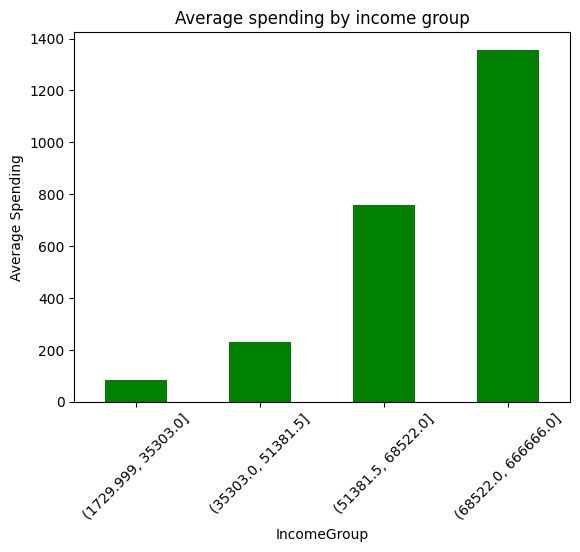

In [311]:
group_Income.plot(kind='bar', color="green")
plt.title("Average spending by income group")
plt.ylabel("Average Spending")
plt.xticks(rotation=45)


In [313]:
data["AgeGroup"]=pd.qcut(data["Age"], q=4)
group_Age=data.groupby("AgeGroup")["Income"].mean()


C:\Users\13327\AppData\Local\Temp\ipykernel_74316\765441332.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_Age=data.groupby("AgeGroup")["Income"].mean()


(array([0, 1, 2, 3]),
 [Text(0, 0, '(28.999, 48.0]'),
  Text(1, 0, '(48.0, 55.0]'),
  Text(2, 0, '(55.0, 66.0]'),
  Text(3, 0, '(66.0, 132.0]')])

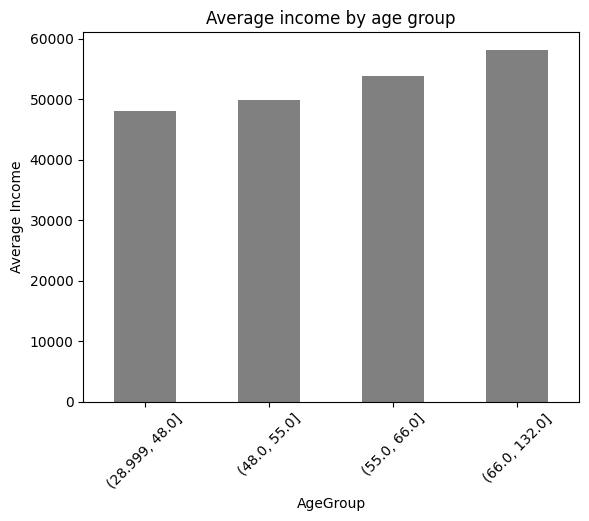

In [316]:
group_Age.plot(kind='bar', color="grey")
plt.title("Average income by age group")
plt.ylabel("Average Income")
plt.xticks(rotation=45)

In [281]:
features=["Age", "Income", "Total_spending", "NumWebPurchases", "NumStorePurchases", "NumWebVisitsMonth","Recency"]

In [282]:
X=data[features].copy()

In [283]:
X

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
0,68,58138.0,1617,8,4,7,58
1,71,46344.0,27,1,2,5,38
2,60,71613.0,776,8,10,4,26
3,41,26646.0,53,2,4,6,26
4,44,58293.0,422,5,6,5,94
...,...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5,46
2236,79,64014.0,444,8,5,7,56
2237,44,56981.0,1241,2,13,6,91
2238,69,69245.0,843,6,10,3,8


In [284]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [285]:
X_scaled= scaler.fit_transform(X)
X_scaled.shape
X.shape

(2216, 7)

In [286]:
from sklearn.cluster import KMeans

In [287]:
wcss=[]

In [288]:
for i in range(2, 10):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

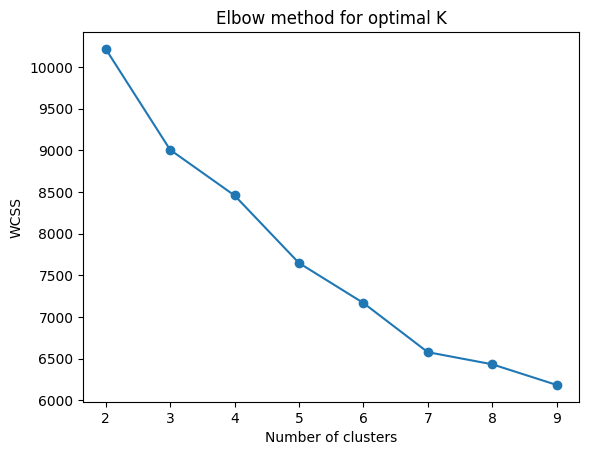

In [289]:
plt.plot(range(2, 10), wcss, marker="o")
plt.title("Elbow method for optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [290]:
kmeans=KMeans(n_clusters=6)
data["Clusters"]=kmeans.fit_predict(X_scaled)
data["Clusters"]

0       5
1       2
2       5
3       2
4       1
       ..
2235    5
2236    3
2237    0
2238    4
2239    3
Name: Clusters, Length: 2216, dtype: int32

In [291]:
cluster_summary=data.groupby("Clusters")[features].mean()
cluster_summary

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Clusters,,,,,,,
0,62.993548,73903.758065,1209.545161,4.329032,8.203226,2.570968,74.722581
1,55.107660,36248.896480,128.134576,2.372671,3.416149,6.436853,77.372671
2,50.155070,31189.504970,79.984095,1.856859,2.972167,6.671968,27.656064
3,64.023179,53051.430464,492.198675,5.119205,6.006623,5.943709,26.354305
4,51.546624,78888.244373,1293.726688,4.733119,8.852090,2.585209,28.321543
5,57.833876,62271.758958,1033.244300,8.511401,8.469055,6.273616,56.674267


In [292]:
data["Clusters"].value_counts()


Clusters
2    503
1    483
4    311
0    310
5    307
3    302
Name: count, dtype: int64

In [294]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca_data=pca.fit_transform(X_scaled)
data["PCA1"], data["PCA2"]=pca_data[:,0], pca_data[:,1]

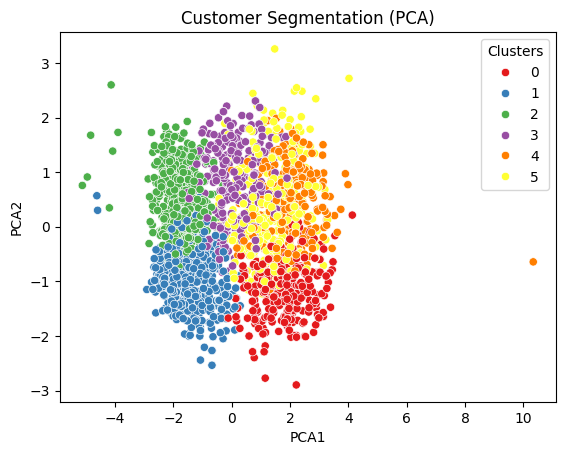

In [296]:
sns.scatterplot(x="PCA1", y="PCA2", hue="Clusters", data=data, palette="Set1")
plt.title("Customer Segmentation (PCA)")
plt.show()

The PCA plot provides a two-dimensional projection of the original high-dimensional feature space, allowing for visual inspection of the k-means clustering results. While PCA was not used to perform the clustering itself, it serves as a useful validation tool.

The visualization shows that the clusters are reasonably well separated. This suggests that the chosen features capture meaningful differences in customer behavior and that the six-cluster k-means solution reflects genuine structure in the data rather than random partitioning. Some overlap is expected, as real-world customer behaviors often exist on a continuum rather than in perfectly distinct groups.


In [317]:
cluster_summary

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Recency
Clusters,,,,,,,
0,62.993548,73903.758065,1209.545161,4.329032,8.203226,2.570968,74.722581
1,55.107660,36248.896480,128.134576,2.372671,3.416149,6.436853,77.372671
2,50.155070,31189.504970,79.984095,1.856859,2.972167,6.671968,27.656064
3,64.023179,53051.430464,492.198675,5.119205,6.006623,5.943709,26.354305
4,51.546624,78888.244373,1293.726688,4.733119,8.852090,2.585209,28.321543
5,57.833876,62271.758958,1033.244300,8.511401,8.469055,6.273616,56.674267


Cluster 0 — High-Income, At-Risk Spenders

Customers in this cluster are relatively older and have a high income level. They exhibit high overall spending, with a strong contribution from both web and in-store purchases. Their low number of web visits aligns with their age profile, suggesting a preference for in-store shopping. However, their very high recency indicates infrequent recent purchases, which suggests either one-time large purchases or declining engagement. This group represents a retention risk, and marketing efforts should focus on re-engagement and loyalty-building initiatives.

Cluster 1 — Low-Income Browsers

This cluster consists of moderately aged customers with low income and correspondingly low total spending. They make very few purchases despite having a high number of web visits, indicating browsing or window-shopping behavior rather than active purchasing. Their high recency further supports low engagement. These customers are likely price-sensitive, and marketing campaigns centered on discounts, promotions, or entry-level offerings may be effective in converting interest into purchases.

Cluster 2 — Young, Early-Stage Customers

Cluster 2 represents the youngest group of customers, with the lowest income and lowest spending levels. They make very few purchases but have many web visits, suggesting active exploration without commitment. Their low recency indicates recent interaction with the business, placing them early in the customer lifecycle. Marketing strategies should focus on onboarding, education, and introductory offers to gradually convert these customers into active buyers.

Cluster 3 — Loyal, Moderate-Value Customers

This cluster contains the oldest customers on average, with medium income and moderate spending levels. Their purchases are balanced between web and in-store channels, and their low recency indicates consistent and recent engagement. These customers appear loyal and stable, making them valuable long-term contributors. Relationship-focused marketing, such as personalized communication and appreciation campaigns, should be prioritized to maintain their loyalty.

Cluster 4 — High-Value VIP Customers

Customers in Cluster 4 have the highest income and highest overall spending among all groups. They make frequent purchases across both web and store channels, and their low recency indicates strong and ongoing engagement. This group represents the most valuable customers to the business. Marketing efforts should emphasize VIP treatment, exclusive offers, loyalty rewards, and personalized experiences to retain and further strengthen their relationship with the company.

Cluster 5 — Digitally Engaged High Spenders

This cluster includes relatively older customers with high income and high spending. They have the highest number of web purchases and very high web visit counts, indicating strong digital engagement, while also maintaining high in-store purchases. Their recency is moderately high, suggesting they may not be as consistently loyal as Cluster 4, but they remain highly active online. Targeted digital marketing campaigns, such as personalized emails and online promotions, are likely to be particularly effective for this group.
